# ETL Titanic

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("titanic.csv")

In [4]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.shape

(891, 12)

In [6]:
df_backup = df.copy()

In [7]:
nulos_por_colunas = df.isnull().sum()
print(nulos_por_colunas)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
nulos_por_linhas = df.isnull().sum(axis=1)
print(nulos_por_linhas)

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64


In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df = df.drop_duplicates()

In [12]:
# Apagar linhas duplicadas da coluna
df_teste = df.drop_duplicates(["PassengerId"])

In [13]:
# Para visualizar as linhas duplicadas
def visualizar_as_duplicadas(df):
    duplicados = df[df.duplicated(keep=False)]
    return duplicados

linhas_duplicadas = visualizar_as_duplicadas(df)
print(linhas_duplicadas)
# Testar print(df[df.duplicated()])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [14]:
df = df.drop(columns=["SibSp", "Parch"])

In [15]:
# Apagas as informações NaN
df_teste = df.dropna(subset=["Cabin"])

In [16]:
# Resetar o index
df = df.reset_index(drop=True)

In [17]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [18]:
df.rename(columns={
    'PassengerId':'idPassageiro',
    'Survived': 'Sobreviveu',
    'Pclass': 'Classe',
    'Name': 'Nome',
    'Sex': 'Genero',
    'Age': "Idade",
    'Ticket': 'Bilhete',
    'Fare': 'Tarifa',
    'Cabin': 'Cabine',
    'Embarked': 'Embarcou'
}, inplace=True)

In [19]:
df.columns

Index(['idPassageiro', 'Sobreviveu', 'Classe', 'Nome', 'Genero', 'Idade',
       'Bilhete', 'Tarifa', 'Cabine', 'Embarcou'],
      dtype='object')

In [20]:
df.to_csv('titanic_tratado.csv', index=False)

In [21]:
df.head()

,idPassageiro,Sobreviveu,Classe,Nome,Genero,Idade,Bilhete,Tarifa,Cabine,Embarcou
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S


## Análises

Quantos passageiros etavam em cada classe do Titanic?

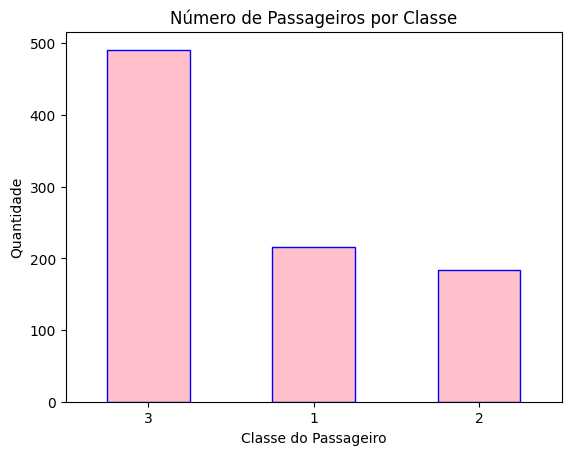

In [22]:
contagem_passageiros = df["Classe"].value_counts()

contagem_passageiros.plot(kind="bar", edgecolor="blue", color="pink")
plt.xlabel("Classe do Passageiro")
plt.ylabel("Quantidade")
plt.title("Número de Passageiros por Classe")
plt.xticks(rotation=0)
plt.show()

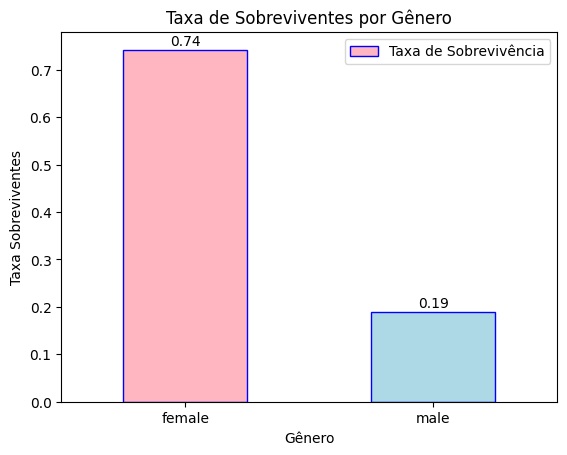

In [23]:
taxa_sob_genero = df.groupby("Genero")["Sobreviveu"].mean()

cores = ["lightpink", "lightblue"]
barras = taxa_sob_genero.plot.bar(edgecolor="blue", color=cores)
plt.xlabel("Gênero")
plt.ylabel("Taxa Sobreviventes")
plt.title("Taxa de Sobreviventes por Gênero")
plt.xticks(rotation=0)
plt.legend(["Taxa de Sobrevivência"])

for i, v in enumerate(taxa_sob_genero):
    barras.text(i, v + 0.01, f'{v:.2f}', color="black", ha="center")

plt.show()

Qual distribuição de idades?

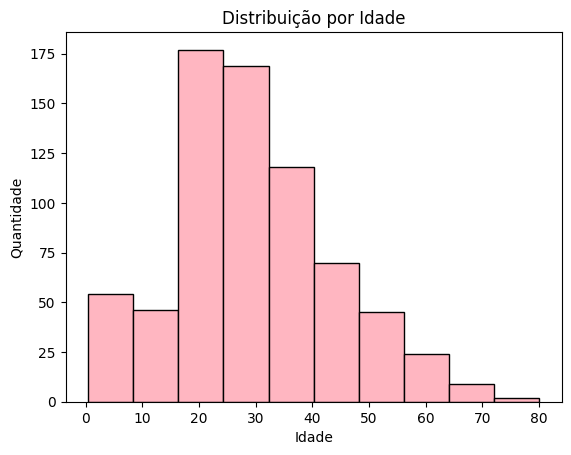

In [36]:
df["Idade"].plot.hist(bins= 10, edgecolor="black", color="lightpink")
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.title("Distribuição por Idade")

plt.show()

## Teste de hipótese
Teste de Idade e Sobrevivência

Hipótese Nula H0: Os sobreviventes não tem relação com a idade dos passageiros \
Hipótese Alternativa H1: Os sobreviventes tem relação com a idade dos passageiros

In [54]:
from scipy.stats import ttest_ind
import seaborn as sns

In [48]:
# Amostras
idade_sobreviventes = df[df["Sobreviveu"]==1]["Idade"].dropna()
idade_nao_sobreviveu = df[df["Sobreviveu"]==0]["Idade"].dropna()

# Teste T
estatistica_t, valor_p = ttest_ind(idade_sobreviventes, idade_nao_sobreviveu)

print("Teste T de idade")
print(f"Estatística T: {estatistica_t}")
print(f"Valor P: {valor_p}")

Teste T de idade
Estatística T: -2.06668694625381
Valor P: 0.03912465401348249


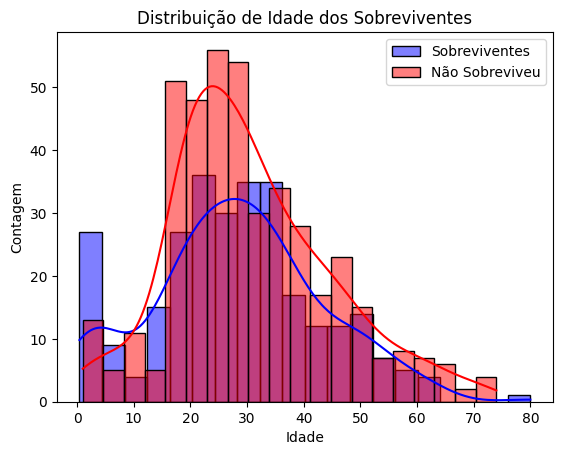

Rejeitamos a hipótese nula.


In [58]:
sns.histplot(idade_sobreviventes, color="blue", label="Sobreviventes", kde=True, bins=20)
sns.histplot(idade_nao_sobreviveu, color="red", label="Não Sobreviveu", kde=True, bins=20)
plt.legend()
plt.title("Distribuição de Idade dos Sobreviventes")
plt.xlabel("Idade")
plt.ylabel("Contagem")
plt.show()

if valor_p < 0.05:
    print("Rejeitamos a hipótese nula.")
else:
    print("Não rejeitamos a hipótese nula")

## SQL
Amostra e SQL

In [59]:
# Sample cria uma amostra aleatória
baby_df = df.sample(100)

In [60]:
baby_df.head()

,idPassageiro,Sobreviveu,Classe,Nome,Genero,Idade,Bilhete,Tarifa,Cabine,Embarcou
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,S.O.C. 14879,73.5000,NaN,S
163,164,0,3,"Calic, Mr. Jovo",male,17.0,315093,8.6625,NaN,S
57,58,0,3,"Novel, Mr. Mansouer",male,28.5,2697,7.2292,NaN,C
226,227,1,2,"Mellors, Mr. William John",male,19.0,SW/PP 751,10.5000,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,347082,31.2750,NaN,S


In [61]:
import sqlite3

In [63]:
# Conexão
conn = sqlite3.connect(':memory:')

# Escrever o df em uma tabela sql
baby_df.to_sql('baby_df', conn, index=False, if_exists='replace')

# Executar a consulta
query_sql = """
SELECT Genero, COUNT(IdPassageiro) AS Contagem
FROM baby_df
GROUP BY Genero;
"""

contagem_por_gen = pd.read_sql_query(query_sql, conn)
print(contagem_por_gen)

# Fechar a conexão
conn.close()

   Genero  Contagem
0  female        33
1    male        67


In [65]:
# pandas
contagem_por_genero = baby_df['Genero'].value_counts().reset_index()
contagem_por_genero.columns = ['Genero', 'Contagem']
print(contagem_por_genero)

   Genero  Contagem
0    male        67
1  female        33
